In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.model_selection import StratifiedKFold
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics.cluster import completeness_score

In [3]:
df0 = pd.read_csv(r'C:\Users\SAM-PC\Downloads\HBA_HW\HW3\Class0.csv')
df1 = pd.read_csv(r'C:\Users\SAM-PC\Downloads\HBA_HW\HW3\Class1.csv')
df2 = pd.read_csv(r'C:\Users\SAM-PC\Downloads\HBA_HW\HW3\Class2.csv')

In [4]:
df=df0.append(df1).append(df2)

In [7]:
df2.head(15)

,Input File,Mean Intensity (dB),Mean F1 (Hz),Mean F2 (Hz),Class
0,class2_0011,77.762368,992.849930,1783.578967,2
1,class2_0015,79.293635,1214.144875,1841.277744,2
2,class2_0028,77.340683,1407.426485,1919.382967,2
3,class2_0043,77.784575,988.094755,1764.218018,2
4,class2_0053,75.805315,1045.355318,1690.118259,2
5,class2_0065,73.342271,994.551678,1903.226492,2
6,class2_0074,77.065037,1096.560940,1918.425804,2
7,class2_0099,76.219127,1401.141089,1888.044255,2
8,class2_0104,73.455123,1410.993848,2123.757795,2
9,class2_0133,77.447218,1446.876479,2079.052353,2


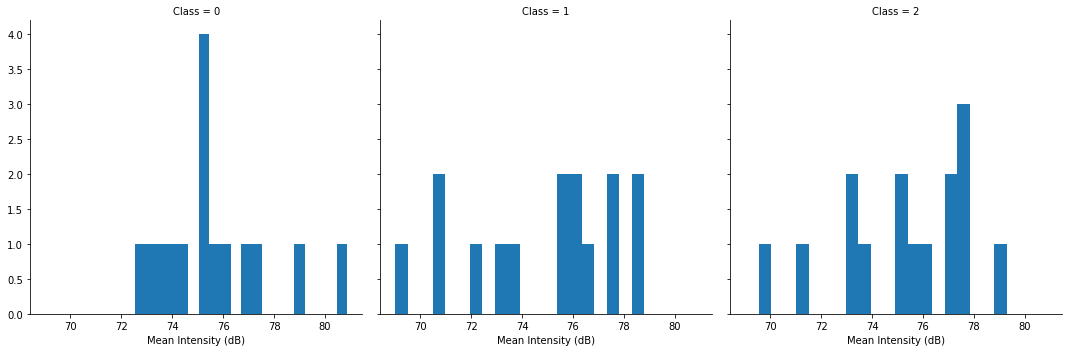

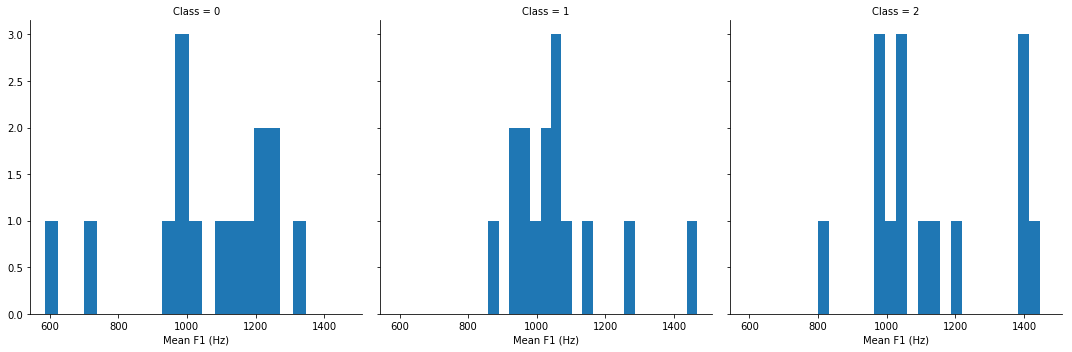

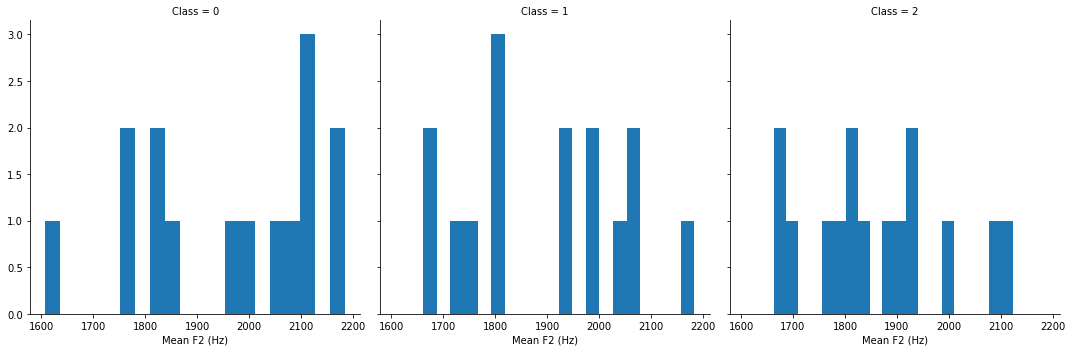

In [14]:
#Plotting Histograms for Different Classes
g0 = sns.FacetGrid(df, col='Class', size=5)
g0.map(plt.hist, 'Mean Intensity (dB)', bins=20)
g1 = sns.FacetGrid(df, col='Class', size=5)
g1.map(plt.hist, 'Mean F1 (Hz)', bins=20)
g2 = sns.FacetGrid(df, col='Class', size=5)
g2.map(plt.hist, 'Mean F2 (Hz)', bins=20)

In [6]:
ttest_intensity_class_0_vs_1 = stats.ttest_ind(df0["Mean Intensity (dB)"],df1["Mean Intensity (dB)"])
ttest_intensity_class_1_vs_2 = stats.ttest_ind(df1["Mean Intensity (dB)"],df2["Mean Intensity (dB)"])
ttest_intensity_class_2_vs_0 = stats.ttest_ind(df2["Mean Intensity (dB)"],df0["Mean Intensity (dB)"])
print("Ttest for Mean Intensity Between Class0 and Class1: "+str(ttest_intensity_class_0_vs_1))
print("Ttest for Mean Intensity Between Class1 and Class2: "+str(ttest_intensity_class_1_vs_2))
print("Ttest for Mean Intensity Between Class2 and Class0: "+str(ttest_intensity_class_2_vs_0))

Ttest for Mean Intensity Between Class0 and Class1: Ttest_indResult(statistic=0.8377423073511991, pvalue=0.4092697076210815)
Ttest for Mean Intensity Between Class1 and Class2: Ttest_indResult(statistic=-0.5223807106171713, pvalue=0.6055141024428679)
Ttest for Mean Intensity Between Class2 and Class0: Ttest_indResult(statistic=-0.3017199242462727, pvalue=0.7650952047736066)


In [7]:
ttest_f1_class_0_vs_1 = stats.ttest_ind(df0["Mean F1 (Hz)"],df1["Mean F1 (Hz)"])
ttest_f1_class_1_vs_2 = stats.ttest_ind(df1["Mean F1 (Hz)"],df2["Mean F1 (Hz)"])
ttest_f1_class_2_vs_0 = stats.ttest_ind(df2["Mean F1 (Hz)"],df0["Mean F1 (Hz)"])
print("Ttest for Mean F1 Between Class0 and Class1: "+str(ttest_f1_class_0_vs_1))
print("Ttest for Mean F1 Between Class1 and Class2: "+str(ttest_f1_class_1_vs_2))
print("Ttest for Mean F1 Between Class2 and Class0: "+str(ttest_f1_class_2_vs_0))

Ttest for Mean F1 Between Class0 and Class1: Ttest_indResult(statistic=0.13936267434578162, pvalue=0.8901611531775196)
Ttest for Mean F1 Between Class1 and Class2: Ttest_indResult(statistic=-1.212625808154044, pvalue=0.23540532642409467)
Ttest for Mean F1 Between Class2 and Class0: Ttest_indResult(statistic=0.9425114110646402, pvalue=0.3539925571795449)


In [8]:
ttest_f2_class_0_vs_1 = stats.ttest_ind(df0["Mean F2 (Hz)"],df1["Mean F2 (Hz)"])
ttest_f2_class_1_vs_2 = stats.ttest_ind(df1["Mean F2 (Hz)"],df2["Mean F2 (Hz)"])
ttest_f2_class_2_vs_0 = stats.ttest_ind(df2["Mean F2 (Hz)"],df0["Mean F2 (Hz)"])
print("Ttest for Mean F2 Between Class0 and Class1: "+str(ttest_f2_class_0_vs_1))
print("Ttest for Mean F2 Between Class1 and Class2: "+str(ttest_f2_class_1_vs_2))
print("Ttest for Mean F2 Between Class2 and Class0: "+str(ttest_f2_class_2_vs_0))

Ttest for Mean F2 Between Class0 and Class1: Ttest_indResult(statistic=1.1001350362611368, pvalue=0.2806420337447373)
Ttest for Mean F2 Between Class1 and Class2: Ttest_indResult(statistic=0.7137541870579905, pvalue=0.48128688179239654)
Ttest for Mean F2 Between Class2 and Class0: Ttest_indResult(statistic=-1.843353554860907, pvalue=0.0758866795390087)


In [9]:
anova_intensity_class_0_1_2 = stats.f_oneway(df0["Mean Intensity (dB)"],df1["Mean Intensity (dB)"],df2["Mean Intensity (dB)"])
anova_f1_class_0_1_2 = stats.f_oneway(df0["Mean F1 (Hz)"],df1["Mean F1 (Hz)"],df2["Mean F1 (Hz)"])
anova_f2_class_0_1_2 = stats.f_oneway(df0["Mean F2 (Hz)"],df1["Mean F2 (Hz)"],df2["Mean F2 (Hz)"])
print("ANOVA for Mean Intensity Between Class 0, 1 and 2: "+str(anova_intensity_class_0_1_2))
print("ANOVA for Mean F1 Between Class 0, 1 and 2: "+str(anova_f1_class_0_1_2))
print("ANOVA for Mean F2 Between Class 0, 1 and 2: "+str(anova_f2_class_0_1_2))

ANOVA for Mean Intensity Between Class 0, 1 and 2: F_onewayResult(statistic=0.3640934341007462, pvalue=0.6969977043760991)
ANOVA for Mean F1 Between Class 0, 1 and 2: F_onewayResult(statistic=0.7937741839530502, pvalue=0.45880042324500303)
ANOVA for Mean F2 Between Class 0, 1 and 2: F_onewayResult(statistic=1.7281089217485994, pvalue=0.19000973265533877)


In [15]:
#Removing Input and Class Column from Training and Testing Data
X = np.array(df.iloc[:,1:-1])
y = np.array(df['Class'])

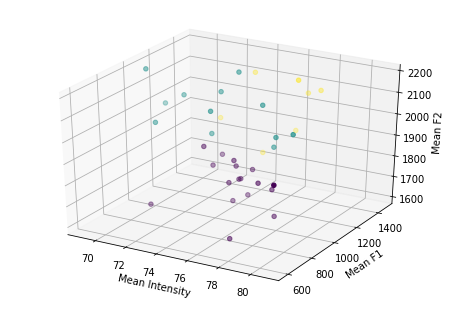

Completeness Score:  0.6000000000000001


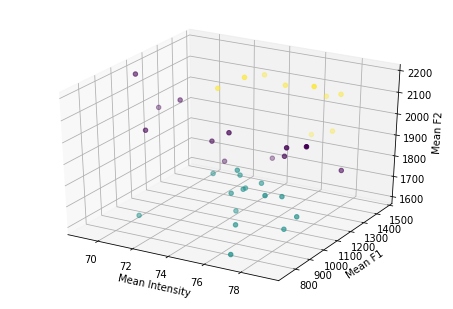

Completeness Score:  0.1807489632637144


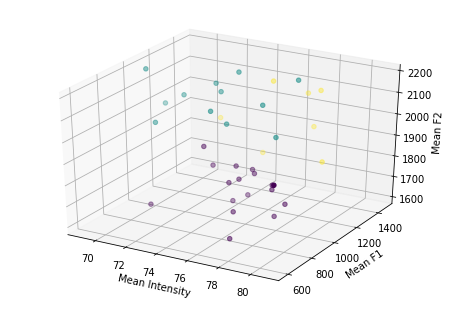

Completeness Score:  0.4000000000000001


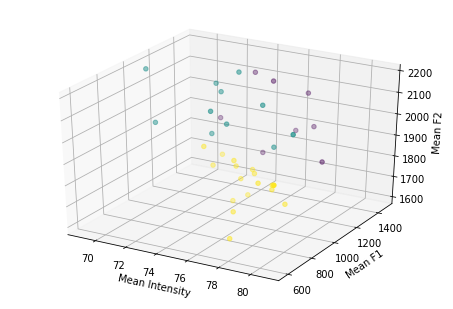

Completeness Score:  0.18074896326371442


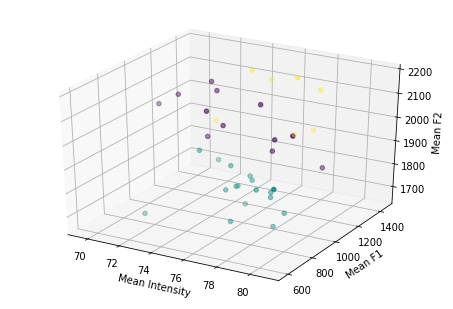

Completeness Score:  0.45480350842425626
The Mean Completeness Score of the 5 Training Kmeans Models:  0.3632602869903371


In [17]:
#Kmeans Classifier Using Stratified 5-Fold
comp_sum = 0
skf = StratifiedKFold(n_splits=5)
skf.get_n_splits(X, y)
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    kmeans = KMeans(n_clusters=3, n_init=20, max_iter=1000)
    kmeans.fit(X_train,y_train)
    y_predict = kmeans.predict(X_test)
    #Plot 3D Graph of Trained KMeans
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(X_train[:,0],X_train[:,1],X_train[:,2], c=kmeans.labels_.astype(float))
    ax.set_xlabel('Mean Intensity')
    ax.set_ylabel('Mean F1')
    ax.set_zlabel('Mean F2')
    plt.show()
    #Checking Completeness Score
    print("Completeness Score: ",completeness_score(y_test,y_predict))
    comp_sum += completeness_score(y_test,y_predict)
mean_score = comp_sum/5
print("The Mean Completeness Score of the 5 Training Kmeans Models: ",mean_score)